# Restaurant Comment Analysis

<img src='https://assets.simpleviewcms.com/simpleview/image/fetch/c_pad,h_600,q_75,w_1122/https://lasvegas.simpleviewcrm.com/images/listings/original_Bacchanal-Buffet-at-Caesars-Palace.jpg'/>

### Importing Required Packages

In [171]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
warnings.filterwarnings("ignore")

## Load the data

In [172]:
df = pd.read_csv('restaurant.csv')

## Remember

## EDA - Exploratory Data Analysis

In [173]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [174]:
# Drop the columns that are not required
df = df.drop(['Unnamed: 0','business_id', 'review_id', 'user_id'], axis=1)

In [175]:
df.shape

(10417, 6)

In [176]:
df.sample(5)

,stars,useful,funny,cool,text,date
6836,5,0,0,0,Amazing food. Lots of choices. A little bit o...,2013-02-19 03:33:52
2878,3,0,0,0,I'm begining to dislike buffets. Maybe because...,2015-08-11 12:27:20
5522,5,0,0,0,CLAMS. CHOCOLATE MOUSSE DESSERTS. GELATO. FRES...,2014-01-11 04:37:51
9488,5,1,1,0,Excellent!!! Been here like 4 times and every ...,2018-08-23 23:37:34
8899,4,4,3,4,The most grand and probably the best buffet on...,2019-01-25 23:30:44


In [177]:
df.isnull().sum()

stars     0
useful    0
funny     0
cool      0
text      0
date      0
dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   10417 non-null  int64 
 1   useful  10417 non-null  int64 
 2   funny   10417 non-null  int64 
 3   cool    10417 non-null  int64 
 4   text    10417 non-null  object
 5   date    10417 non-null  object
dtypes: int64(4), object(2)
memory usage: 488.4+ KB


In [179]:
df.describe()

,stars,useful,funny,cool
count,10417.000000,10417.000000,10417.000000,10417.000000
mean,3.777671,1.419603,0.640875,0.759720
std,1.331451,4.875888,3.347964,4.125847
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,176.000000,159.000000,172.000000


In [180]:
df['date'] = pd.to_datetime(df['date'])

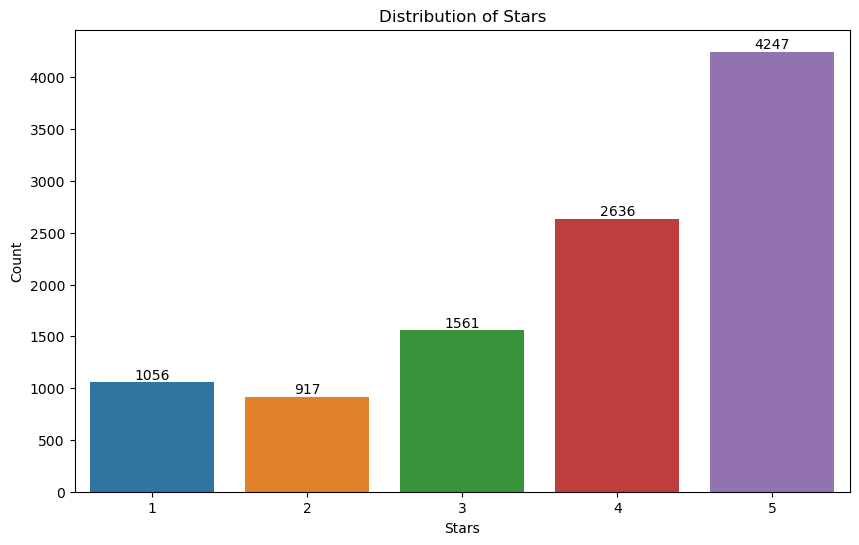

In [181]:
# Distribution of Stars
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df['stars'])
ax.bar_label(ax.containers[0])
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()


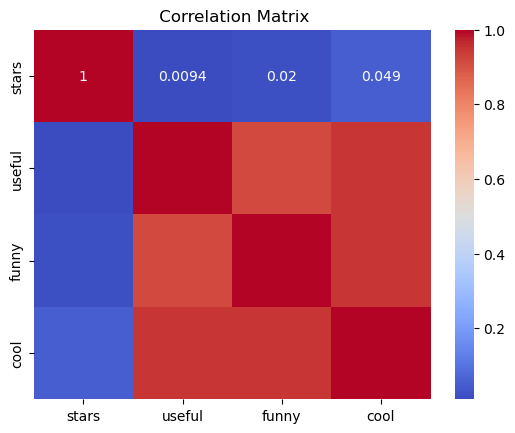

In [182]:
# Correlation Matrix
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title(' Correlation Matrix')
plt.show()

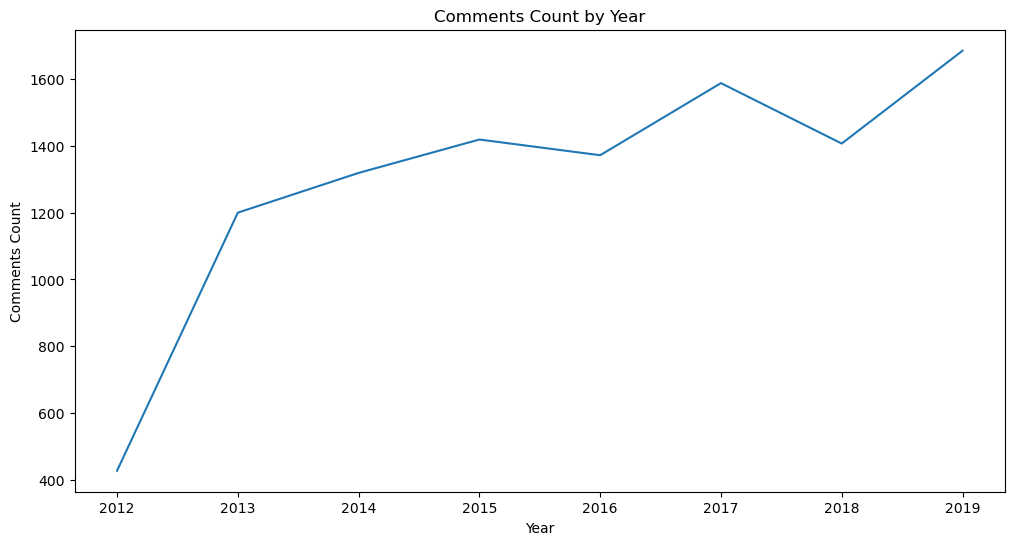

In [183]:
# Comments Count by Year

df['year'] = df['date'].dt.year
yearly_reviews = df.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', data=yearly_reviews)
plt.title('Comments Count by Year')
plt.xlabel('Year')
plt.ylabel('Comments Count')
plt.show()

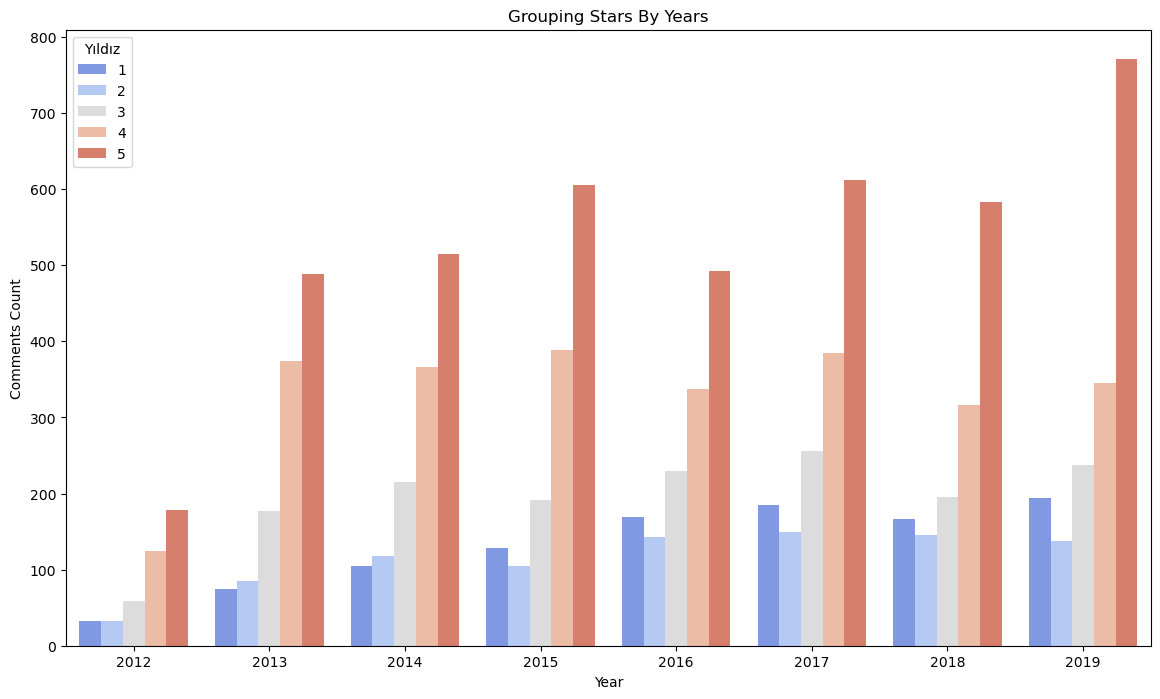

In [184]:
# Grouping stars by years
yearly_star_counts = df.groupby(['year', 'stars']).size().reset_index(name='count')
yearly_star_counts['year'] = yearly_star_counts['year'].astype(str)
yearly_star_counts['stars'] = yearly_star_counts['stars'].astype(str)

plt.figure(figsize=(14, 8))
sns.barplot(x='year', y='count', hue='stars', data=yearly_star_counts, palette='coolwarm')
plt.title('Grouping Stars By Years')
plt.xlabel('Year')
plt.ylabel('Comments Count')
plt.legend(title='Yıldız')
plt.show();

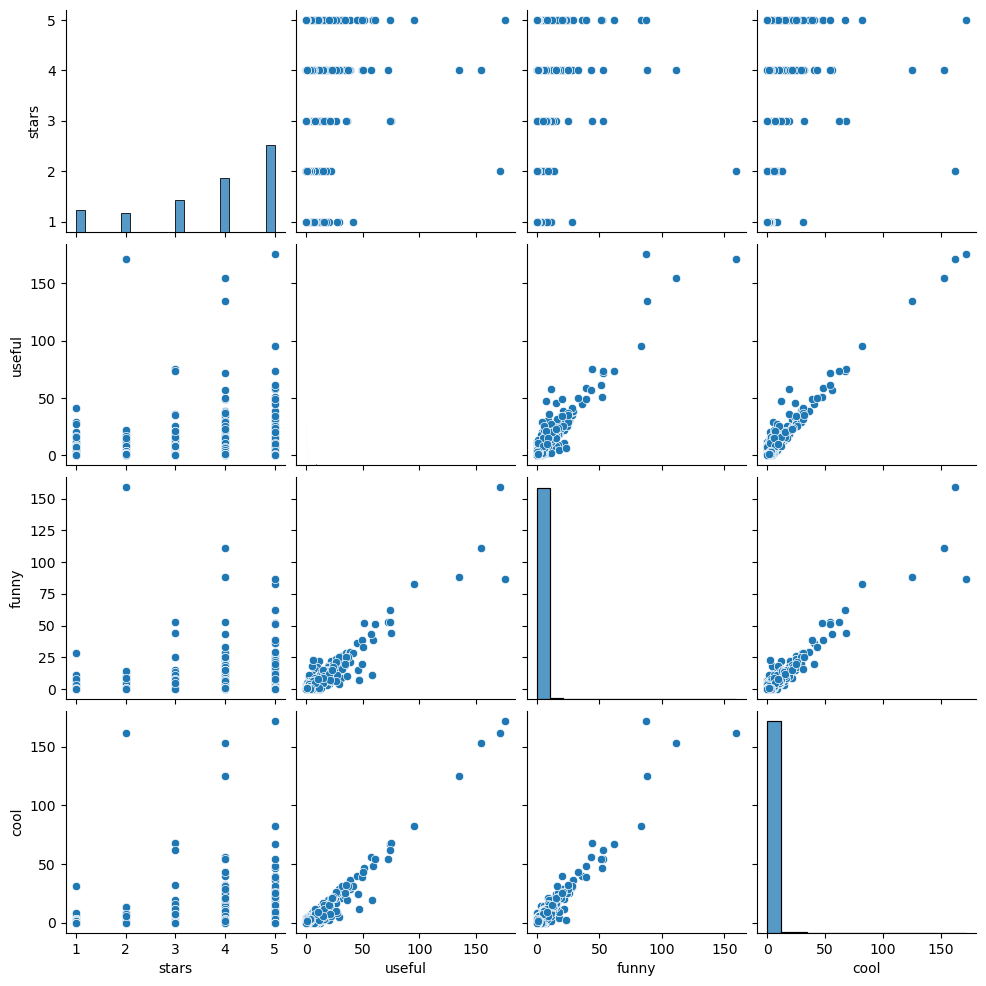

In [185]:
sns.pairplot(df[['stars', 'useful', 'funny', 'cool']])
plt.show()

### Sentiment Column
 A sentiment column was created according to the stars.
* 1-2 stars negative,
* 3 stars neutral, 
* 4-5 stars positive were marked.

In [186]:
# add sentiment column
df['sentiment'] = df['stars'].apply(lambda x: 'positive' if x > 3 else 'neutral' if x == 3 else 'negative')
df = df.reindex(columns=['stars','sentiment'] + [col for col in df.columns if col != 'sentiment' and col != 'stars'])

In [187]:
df.sample(10)

,stars,sentiment,useful,funny,cool,text,date,year
3585,3,neutral,0,0,0,The wait was atrocious and the ladies at the f...,2018-06-01 02:34:17,2018
9318,3,neutral,0,0,0,I went for brunch. The Wagu beef was good. Sal...,2019-09-20 22:35:45,2019
276,4,positive,0,0,0,First time here.\n\nThe cuisine was Multi-cult...,2016-01-17 23:50:57,2016
4598,5,positive,0,0,0,This place had never disappointed me every tim...,2017-07-05 06:44:55,2017
9909,5,positive,14,7,9,I am not going to reiterate what has been said...,2018-07-23 19:54:22,2018
1837,5,positive,0,0,0,Best buffet on town. Period!! We arrived exact...,2015-12-24 00:28:31,2015
3435,2,negative,10,4,3,The Bacchanal Buffet at Caesar's Palace was a ...,2016-10-19 14:16:37,2016
8928,5,positive,0,0,0,Best food best best service\nbest Francesico t...,2019-03-10 10:23:48,2019
5767,4,positive,0,0,0,Solid buffet but a little pricey for a Sunday ...,2015-11-18 08:27:17,2015
7457,2,negative,0,0,0,"In my opinion, this place doesn't live up to i...",2017-02-07 07:33:51,2017


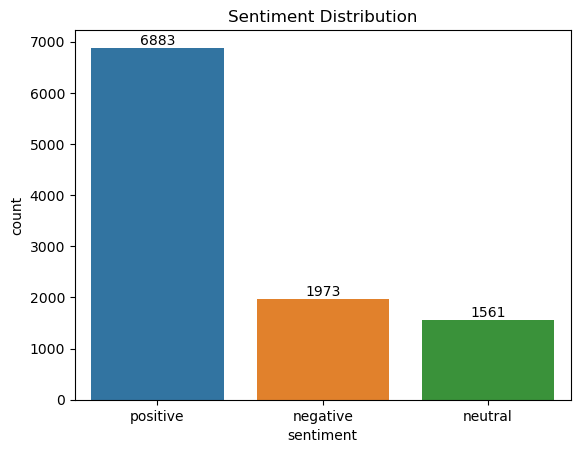

In [188]:
# Sentiment Distribution
ax = sns.countplot(x='sentiment', data=df)
ax.bar_label(ax.containers[0])
plt.title('Sentiment Distribution');

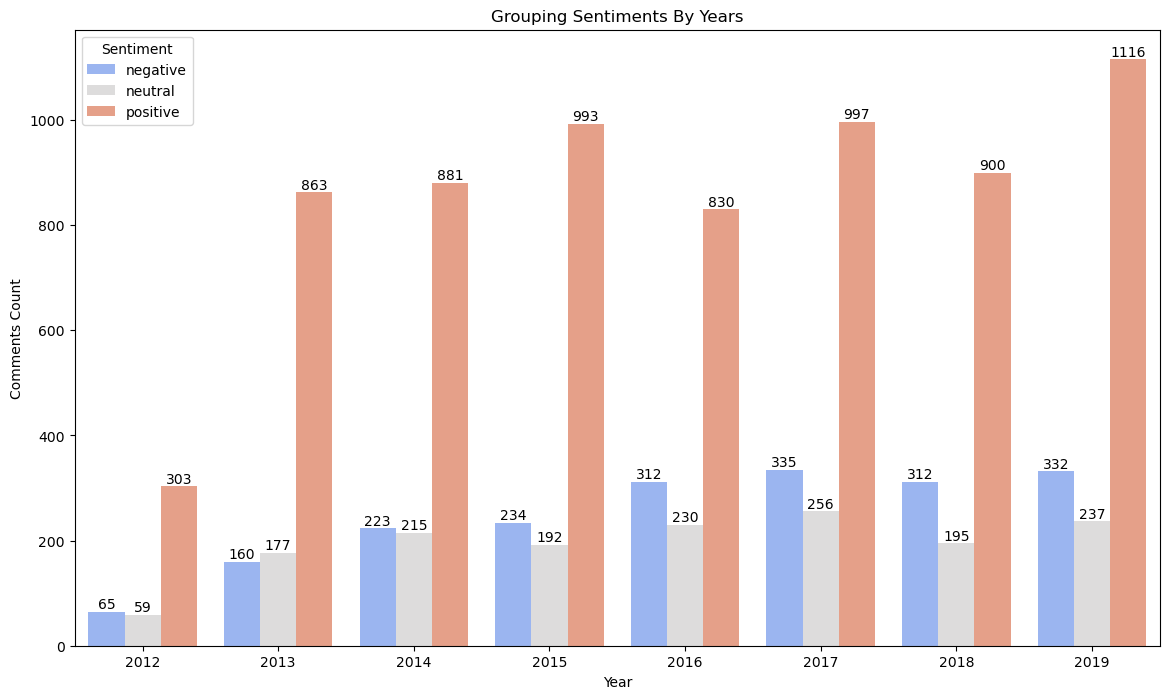

In [189]:
# Grouping sentiments by years
yearly_star_counts = df.groupby(['year', 'sentiment']).size().reset_index(name='count')
yearly_star_counts['year'] = yearly_star_counts['year'].astype(str)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='year', y='count', hue='sentiment', data=yearly_star_counts, palette='coolwarm')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Grouping Sentiments By Years')
plt.xlabel('Year')
plt.ylabel('Comments Count')
plt.legend(title='Sentiment')
plt.show();

### Text Preprocessing

In [190]:
df.head(2)

,stars,sentiment,useful,funny,cool,text,date,year
0,5,positive,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,2012
1,4,positive,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,2014


In [191]:
df.text = df.text.str.lower()
df.text = df.text.str.replace('[^\w\s]','' , regex=True)
df.text = df.text.str.replace('\n','')
df.text = df.text.str.replace('\d+' , '' , regex=True)

In [206]:
df.head(2)

,stars,sentiment,useful,funny,cool,text,date,year
0,5,positive,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012
1,4,positive,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,2014


### Detect Language

In [208]:
# detect language
from langdetect import detect
df['language'] = df['text'].apply(lambda x: detect(x))

In [209]:
df.language.value_counts()

language
en       10374
es          10
zh-cn        7
ja           7
ko           6
de           4
fr           4
da           2
sw           1
pt           1
sl           1
Name: count, dtype: int64

In [211]:
# Get non-English ones
df[df['language'] != 'en'].language.value_counts()

language
es       10
zh-cn     7
ja        7
ko        6
de        4
fr        4
da        2
sw        1
pt        1
sl        1
Name: count, dtype: int64

In [215]:
df[df['language'] != 'en'].shape

(43, 9)